<a href="https://colab.research.google.com/github/binlee52/deep-learning-from-scratch/blob/master/ch3_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network(신경망)

활성화함수(activation function) : 입력 신호의 총합을 출력 신호로 변환하는 함수
<p>ex) 계단함수(step function)


In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
# 스칼라 값과 numpy 배열을 연산할 때는 스칼라 값이 numpy 배열과 같은 크기로 brodcast 된다.
t = np.array([1., 2., 3.])
1.0 + t

array([2., 3., 4.])

In [4]:
1./t

array([1.        , 0.5       , 0.33333333])

In [5]:
# Step Function
def step_function(x):
    y = x > 0                   # 배열 x에서 0보다 크면 true, 작으면 false 반환
    return y.astype(np.int)     # numpy 배열의 자료형 변환 -> astype(), bool에서 int로 변환하므로 np.int를 인수로 지정

In [6]:
step_function(np.array([-1., 1., 2.]))

array([0, 1, 1])

In [7]:
# Step Function
def step_function(x):
    return np.array(x > 0, dtype=np.int)        # numpy 배열에서 0보다 큰 값은 1, 작은 값은 0으로 변환

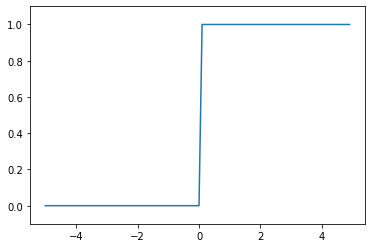

In [8]:
x = np.arange(-5., 5., 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

In [9]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
x = np.array([-1., 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

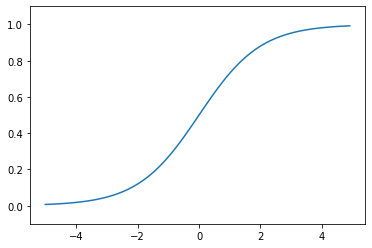

In [11]:
x = np.arange(-5., 5., 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [12]:
#RELU Function
def relu(x):
    return np.maximum(0, x)

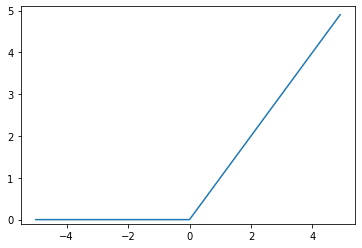

In [13]:
x = np.arange(-5., 5., 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.1) # y축의 범위 지정
plt.show()

In [14]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [15]:
# numpy 배열의 차원
np.ndim(A)

1

In [16]:
# numpy 배열의 형상, 튜플 return
A.shape

(4,)

In [17]:
A.shape[0]

4

In [18]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [19]:
np.ndim(B)

2

In [20]:
B.shape

(3, 2)

In [21]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [22]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [23]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [24]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [25]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [26]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [27]:
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [28]:
A.shape

(2, 3)

In [29]:
# 행렬의 곱연산을 할 때는 대응하는 차원의 원소 수를 일치시켜야 한다
np.dot(A, C)

ValueError: ignored

In [30]:
X = np.array([1., 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [38]:
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [39]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.60]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [44]:
# 출력층의 활성화함수
"""
    출력층의 활성화 함수 정의법

    (1) 회귀: 항등 함수
    (2) 이중 클래스 분류: sigmoid function
    (3) 다중 클래스 분류: softmax function
"""
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

[0.31682708 0.69627909]


In [50]:
# 3층 신경망 정리
def init_network():
    """
        init WEIGHT and BIAS
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 순방향 진행
def forward(network, x):
    """
        입력에서 출력 방향으로 순전파
    """
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1., 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [51]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [53]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [54]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [55]:
# softmax function
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [56]:
# softmax 함수는 지수함수를 사용하므로 overflow 문제가 발생
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

In [58]:
# 지수함수의 overflow 문제를 해결하기 위해 지수의 성질을 이용하여 값의 크기를 줄인다.
c = np.max(a)
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [59]:
# overflow 문제를 해결한 softmax function
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [60]:
a = np.array([0.3, 2.9, 4.])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [62]:
# softmax 함수의 출력의 총합은 1이다. 따라서 소프트맥스 함수의 출력을 '확률'로 해석할 수 있고
# 이를 다중 클래스 분류에 사용할 수 있다.
np.sum(y)

1.0